# Data Preprocessing

From EDA

- `BUI`-`DMC`, `BUI-DC` and `FWI`-`ISI` has high correlation i.e. more than `0.9`.
- Outliers need not be treated.
- `day` should be treated as `categorical` and not `ordinal`.

GOALS

1. Drop feature with high correlation.
2. Encoding categorical data.
3. Selecting Target variable for **regression** and **classification**.
   1. Splitting into train and test set.
   2. Feature Scaling.
   3. Saving dataset as `train.csv` and `test.csv`

TO TRY

- Encoding with `pandas`.


# Importing Libraries


In [41]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


sns.set_theme(style="darkgrid", font_scale=1.4)


# Importing Data


In [42]:
dataset = pd.read_csv("./../data/Cleaned_Dataset.csv")
dataset.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Bejaia
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia


In [43]:
df = dataset.drop(["year"], axis=1)
df.head()


,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Bejaia
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia


# Dealing with high correlation


In [44]:
def plot_corr(corr_data):
    plt.figure(figsize=(13, 9))
    mask = np.triu(np.ones_like(corr_data))
    ax = sns.heatmap(corr_data, mask=mask, fmt=".2f", annot=True, linewidths=0.5, cmap="PuOr", center=0)
    return ax


<AxesSubplot:>

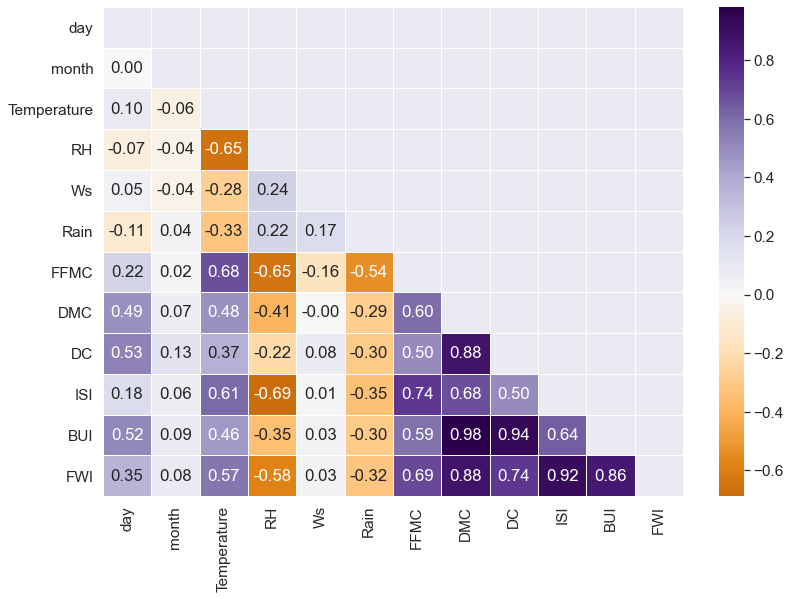

In [45]:
plot_corr(df.corr())


## Variance Inflation Factor


In [46]:
variable = df.select_dtypes(exclude="O")
variable.head()


,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


Data preprocessing steps should be applied for calculating `vif` also as it would be applied on normal model. [Refernce](https://stats.stackexchange.com/questions/461141/is-it-advisable-to-impute-missing-values-and-scale-features-before-computing-the)


In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler


def calc_vif(data):
    sc = StandardScaler()
    scaled_data = sc.fit_transform(data)
    vif_df = pd.DataFrame()
    vif_df["VIF"] = [variance_inflation_factor(scaled_data, i) for i in range(scaled_data.shape[1])]
    vif_df["feature"] = data.columns
    return vif_df.sort_values("VIF", ascending=False).reset_index(drop=True)


In [48]:
calc_vif(variable)


,VIF,feature
0,171.252436,BUI
1,76.361945,DMC
2,40.484087,FWI
3,25.287843,DC
4,23.216773,ISI
5,4.127608,FFMC
6,2.783453,RH
7,2.421438,Temperature
8,1.550481,Rain
9,1.486174,day


OBSERVATION

- `BUI`-`DMC`, `BUI-DC` and `FWI`-`ISI` has high correlation i.e. more than `0.9`.
- Most feature has high `vif`.

TODO

- Remove highly correlated feature with high `vif` and check `vif` again.


In [49]:
calc_vif(variable.drop(["BUI", "FWI"], axis=1))  # After BUI, FWI and ISI had highest VIF


,VIF,feature
0,6.880180,DMC
1,5.484516,DC
2,3.961094,ISI
3,3.665749,FFMC
4,2.750376,RH
5,2.417741,Temperature
6,1.542386,Rain
7,1.483046,day
8,1.301319,Ws
9,1.084039,month


OBSERVATION

- Dropping `BUI` and `FWI` decreased `VIF` of all feature below 10.
- Correlation of feature also pointed towards same conclusion.

TODO

- Drop `BUI` and `FWI` from dataset.


In [50]:
no_multi_col_df = df.drop(["BUI", "FWI"], axis=1)
no_multi_col_df.head()


,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,not fire,Bejaia
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,not fire,Bejaia
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,not fire,Bejaia
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,not fire,Bejaia
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,not fire,Bejaia


# Encoding Categorical Data

- Label Encoding on `Classes` and `Region` (`Region` will have only 1s & 0s, or Ordinal Encoding)
- One Hot Encoding of `day`
- Ordinal Encoding of `month` where value are in such order $8>7>6>9$

TO TRY

- Pandas `.map()` and `.get_dummies()` which will keep in `pd.DataFrame`


In [51]:
no_multi_col_df.nunique()


day             31
month            4
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            166
DC             198
ISI            106
Classes          2
Region           2
dtype: int64

## `Pandas` Method


In [52]:
pd_df = no_multi_col_df.copy()
pd_df.head()


,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,not fire,Bejaia
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,not fire,Bejaia
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,not fire,Bejaia
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,not fire,Bejaia
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,not fire,Bejaia


In [53]:
pd_df = pd.get_dummies(pd_df, drop_first=True, columns=["day", "Classes", "Region"])
pd_df.head()


,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,day_2,...,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,Classes_not fire,Region_Sidi-Bel Abbes
0,6,29,57,18,0.0,65.7,3.4,7.6,1.3,0,...,0,0,0,0,0,0,0,0,1,0
1,6,29,61,13,1.3,64.4,4.1,7.6,1.0,1,...,0,0,0,0,0,0,0,0,1,0
2,6,26,82,22,13.1,47.1,2.5,7.1,0.3,0,...,0,0,0,0,0,0,0,0,1,0
3,6,25,89,13,2.5,28.6,1.3,6.9,0.0,0,...,0,0,0,0,0,0,0,0,1,0
4,6,27,77,16,0.0,64.8,3.0,14.2,1.2,0,...,0,0,0,0,0,0,0,0,1,0


In [54]:
def encode_month(x):
    encoder = {6: 1, 7: 2, 8: 3, 9: 0}
    return encoder[x]


In [55]:
pd_df["month"].apply(encode_month)


0      1
1      1
2      1
3      1
4      1
      ..
239    0
240    0
241    0
242    0
243    0
Name: month, Length: 244, dtype: int64

In [56]:
month_unique = sorted(pd_df["month"].unique())

# can take column name as argument from apply and do sort/unique/index at every apply call
def ordinal_pandas(x):
    return month_unique.index(x)


month_unique


[6, 7, 8, 9]

In [57]:
pd_df["month"].apply(ordinal_pandas)


0      0
1      0
2      0
3      0
4      0
      ..
239    3
240    3
241    3
242    3
243    3
Name: month, Length: 244, dtype: int64

In [58]:
pd_df["month"] = pd_df["month"].map({6: 1, 7: 2, 8: 3, 9: 0})


In [59]:
with pd.option_context("display.max_columns", None):
    display(pd_df.head())


,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,Classes_not fire,Region_Sidi-Bel Abbes
0,1,29,57,18,0.0,65.7,3.4,7.6,1.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,29,61,13,1.3,64.4,4.1,7.6,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,26,82,22,13.1,47.1,2.5,7.1,0.3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,25,89,13,2.5,28.6,1.3,6.9,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,27,77,16,0.0,64.8,3.0,14.2,1.2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


CONCLUSION

**PROS**

- Label for each column/feature.

**CONS**

- mapping of feature will be lost and won't be able to decode it.
- won't be able to use `fit`, `transform` and `inverse_transform` i.e. to convert new data back and forth from encoding to decoding.


# Deciding Target Variable

- Classification will be for `Classes`.
- Regression will be for `Temperature`.

NOTE

- If target for regression has been decided prior, then `vif` and `corr` would have affect for example if `FWI` was supposed to be predicted then it won't be included for `vif` and `corr`.


In [60]:
X_class = pd_df.drop("Classes_not fire", axis=1)
y_class = pd_df[["Classes_not fire"]]

X_reg = pd_df.drop("Temperature", axis=1)
y_reg = pd_df[["Temperature"]]


In [61]:
X_class.shape, y_class.shape, X_reg.shape, y_reg.shape


((244, 40), (244, 1), (244, 40), (244, 1))

# Splitting into Training and Testing Set


In [62]:
from sklearn.model_selection import train_test_split

X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(
    X_class, y_class, test_size=0.15, random_state=64
)
y_class_train.shape, y_class_test.shape


((207, 1), (37, 1))

In [63]:
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
y_reg_train.shape, y_reg_test.shape


((195, 1), (49, 1))

# Feature Scaling

- Need to do use Robust Scaler.
  - Robust Scaler is due to the fact there are some outlier in dataset which are in permissible range hence can not be treated (clapped, drop, transform).


In [64]:
from sklearn.preprocessing import RobustScaler

class_robust_scale = RobustScaler()
reg_robust_scale = RobustScaler()


In [65]:
X_class_train.values


array([[ 3., 35., 48., ...,  0.,  0.,  0.],
       [ 0., 30., 77., ...,  0.,  0.,  0.],
       [ 2., 33., 57., ...,  0.,  0.,  1.],
       ...,
       [ 0., 32., 47., ...,  0.,  0.,  0.],
       [ 0., 34., 44., ...,  0.,  0.,  1.],
       [ 3., 37., 40., ...,  0.,  0.,  1.]])

In [66]:
X_class_train_scaled = X_class_train.values
X_reg_train_scaled = X_reg_train.values


In [67]:
X_class_train_scaled[:, 1:9] = class_robust_scale.fit_transform(X_class_train_scaled[:, 1:9])
X_reg_train_scaled[:, 1:9] = reg_robust_scale.fit_transform(X_reg_train_scaled[:, 1:9])


In [68]:
X_class_test_scaled = X_class_test.values
X_reg_test_scaled = X_reg_test.values


In [69]:
X_class_test_scaled[:, 1:9] = class_robust_scale.transform(X_class_test_scaled[:, 1:9])
X_reg_test_scaled[:, 1:9] = reg_robust_scale.transform(X_reg_test_scaled[:, 1:9])


In [70]:
X_class_train_scaled[1]


array([ 0.        , -0.4       ,  0.66666667,  0.        ,  1.81818182,
       -1.74132492, -0.67164179, -0.492569  , -0.50847458,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [71]:
X_reg_train_scaled[1]


array([ 3.        , -1.23809524,  0.33333333,  0.        ,  0.48571429,
        3.14826498,  2.11041009,  1.52459016,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ])

# Saving Data and Scalers.


## `np.array` to `pd.DataFrame`


In [72]:
def np2pd(*args, columns, axis=0):
    return pd.DataFrame(np.concatenate(args, axis=axis), columns=columns)


In [73]:
class_column = X_class_train.columns.to_list()
class_column.append("Classes")


In [74]:
reg_column = X_reg_train.columns.to_list()
reg_column.append("Temperature")


In [75]:
classification_train_data = np2pd(X_class_train_scaled, y_class_train, axis=1, columns=class_column)
classification_test_data = np2pd(X_class_test_scaled, y_class_test, axis=1, columns=class_column)


In [76]:
regression_train_data = np2pd(X_reg_train_scaled, y_reg_train, axis=1, columns=reg_column)
regression_test_data = np2pd(X_reg_test_scaled, y_reg_test, axis=1, columns=reg_column)


## Saving dataset as `.csv`


In [77]:
classification_train_data.to_csv("./../data/Classification_train_data.csv", index=False)
classification_test_data.to_csv("./../data/Classification_test_data.csv", index=False)


In [78]:
regression_train_data.to_csv("./../data/Regression_train_data.csv", index=False)
regression_test_data.to_csv("./../data/Regression_test_data.csv", index=False)


## Saving objects


In [79]:
import pickle
import os


def serialize_save(obj, file_name):
    if not os.path.isdir("./../scaler"):
        os.mkdir("./../scaler")
    with open(f"./../scaler/{file_name}.pickle", "wb") as f:
        pickle.dump(obj, f)
    return f"{file_name}.pickle saved at ./../scaler"


In [80]:
serialize_save(class_robust_scale, "Classification_Robust_scaler"), serialize_save(
    reg_robust_scale, "Regression_Robust_scaler"
)


('Classification_Robust_scaler.pickle saved at ./../scaler',
 'Regression_Robust_scaler.pickle saved at ./../scaler')

# Encoded Value Chart

**`month`**

| `month` | `mapped month` | `month name` |
| :------ | :------------- | :----------- |
| 9       | 0              | September    |
| 6       | 1              | June         |
| 7       | 2              | July         |
| 8       | 3              | August       |

**`Region`**

| `Region`       | `mapped Region` |
| :------------- | :-------------- |
| Bejaia         | 0               |
| Sidi-Bel Abbes | 1               |

**`Classes`**

| `Classes` | `mapped Classes` |
| :-------- | :--------------- |
| fire      | 0                |
| not fire  | 1                |

**`day`** is one-hot encoded with length of `30` i.e. day 1 is dropped which means 1 will be represented by 30 $0$.
